In [50]:
#!pip install --user tensorflow
#!pip install wordcloud
from wordcloud import WordCloud
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [51]:
file_path = 'spambase.csv'
data = pd.read_csv(file_path)
data = data.drop_duplicates()
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [52]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_notspam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [53]:
print(data.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

spam_notspam
0    2531
1    1679
Name: count, dtype: int64


<Axes: xlabel='spam_notspam', ylabel='count'>

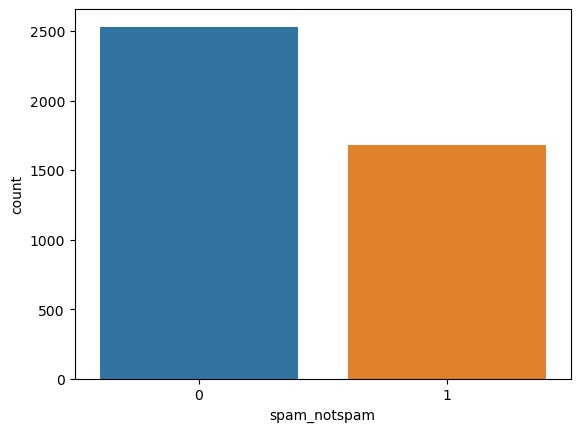

In [54]:
print(data['spam_notspam'].value_counts())
sns.countplot(x='spam_notspam', data=data)

In [55]:
data.groupby('spam_notspam').count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam_notspam,,,,,,,,,,,,,,,,,,,,,
0,2531,2531,2531,2531,2531,2531,2531,2531,2531,2531,...,2531,2531,2531,2531,2531,2531,2531,2531,2531,2531
1,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,...,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679


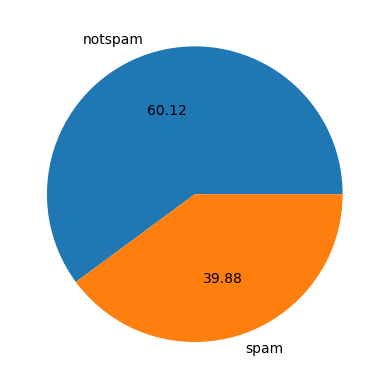

In [56]:
plt.pie(data['spam_notspam'].value_counts(), labels=['notspam','spam'],autopct="%0.2f")
plt.show()

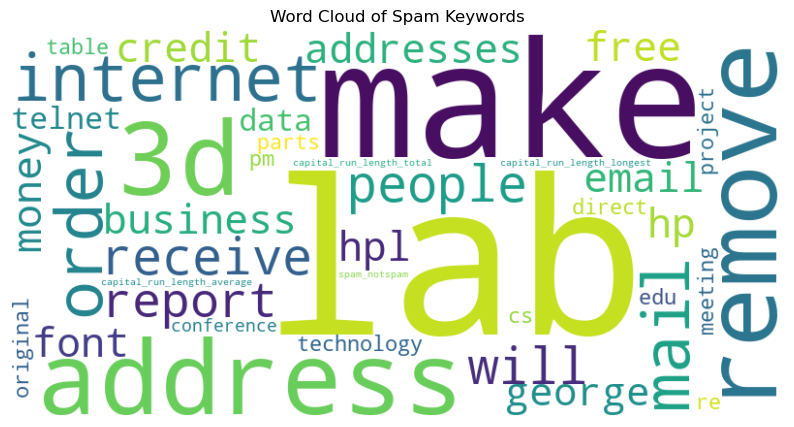

In [84]:
cloud = data.copy()
cloud.columns = cloud.columns.str.replace('word_freq_', '')
cloud.columns = cloud.columns.str.replace('char_freq_', '')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cloud.columns))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Keywords')
plt.show()

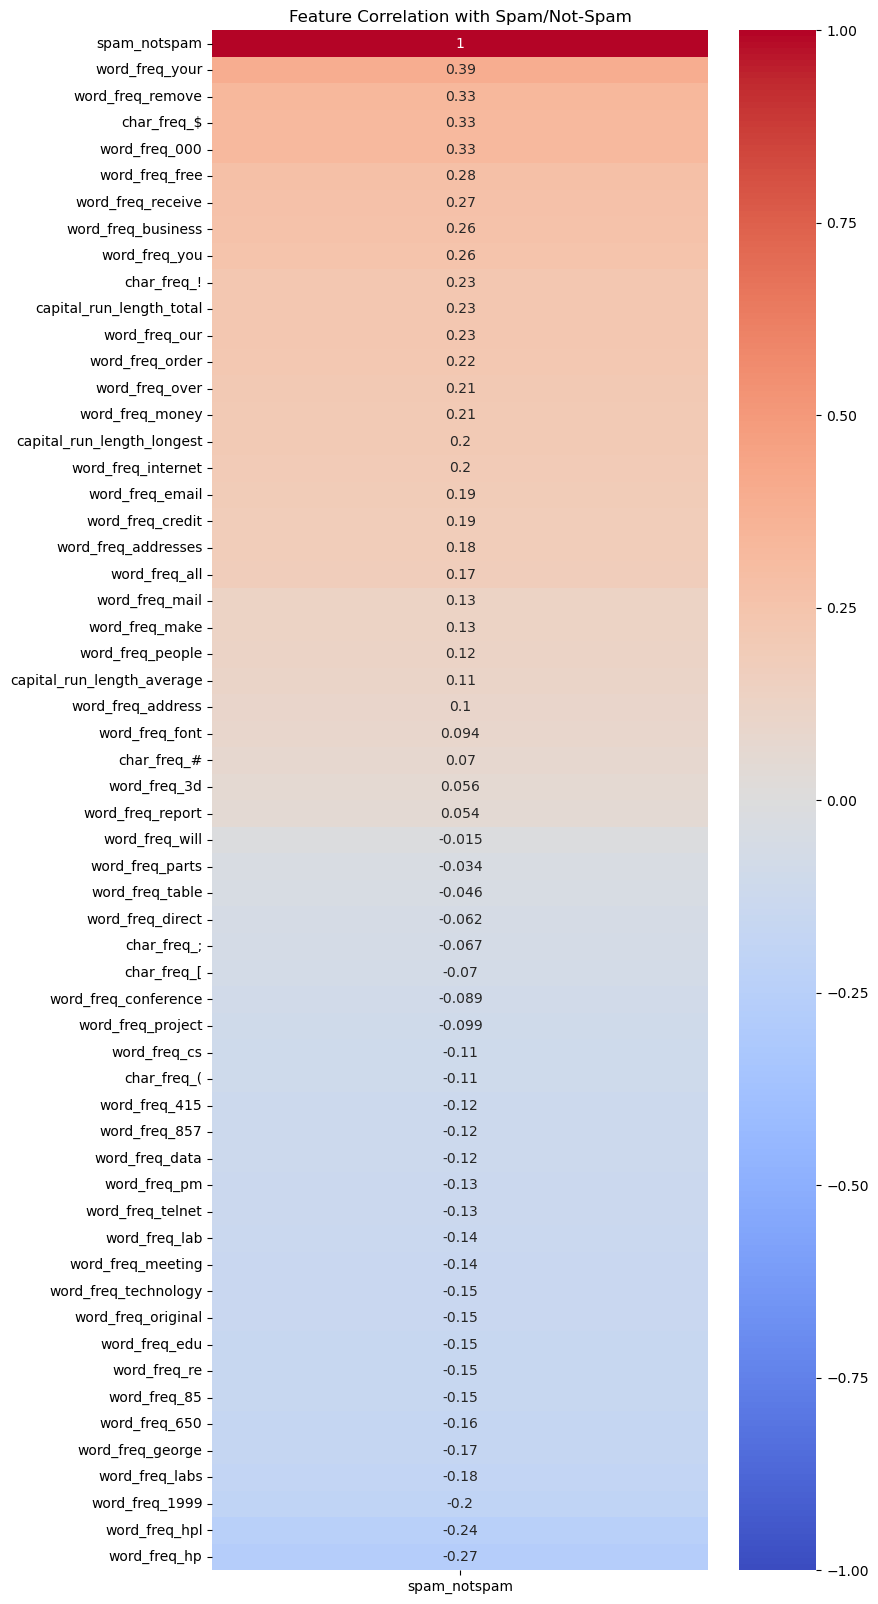

In [58]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 20))
sns.heatmap(corr_matrix[['spam_notspam']].sort_values(by='spam_notspam', ascending=False), 
            vmin=-1, vmax=1, cmap='coolwarm', annot=True, cbar=True)
plt.title('Feature Correlation with Spam/Not-Spam')
plt.show()

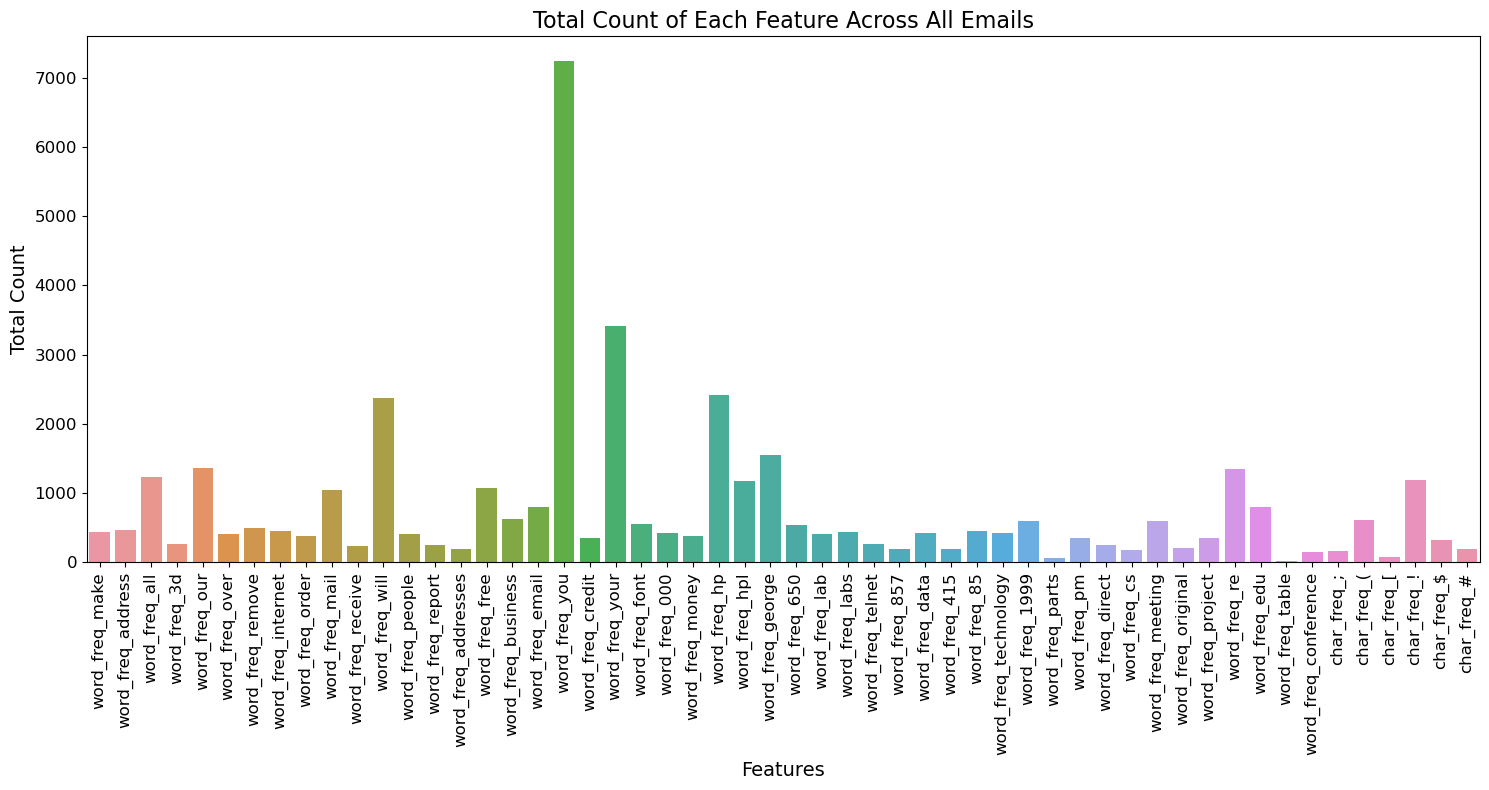

In [83]:
features = data.iloc[:, :-4]
feature_sums = features.sum()
plt.figure(figsize=(15, 8))
sns.barplot(x=feature_sums.index, y=feature_sums.values)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.title('Total Count of Each Feature Across All Emails', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

In [59]:
#Emails with words of those with higher correlation value means that email more likely to be spam.

In [60]:
X = data.drop('spam_notspam', axis=1)
y = data['spam_notspam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       483
           1       0.97      0.92      0.94       359

    accuracy                           0.95       842
   macro avg       0.95      0.95      0.95       842
weighted avg       0.95      0.95      0.95       842



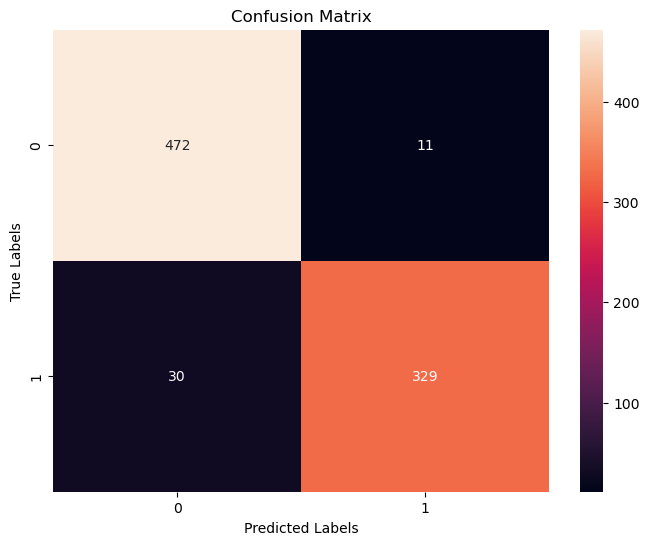

In [61]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_mat = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d").set_title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5626 - loss: 2.3386 - val_accuracy: 0.8116 - val_loss: 0.6293
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.7108 - val_accuracy: 0.7240 - val_loss: 1.6666
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 1.1286 - val_accuracy: 0.7804 - val_loss: 1.3335
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.9492 - val_accuracy: 0.8071 - val_loss: 1.1216
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.7486 - val_accuracy: 0.8917 - val_loss: 0.5049
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 1.2137 - val_accuracy: 0.8783 - val_loss: 0.3337
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.4512 - val_accuracy: 0.8576 - val_loss: 0.6379
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.7820 - val_accuracy: 0.8145 - val_loss:

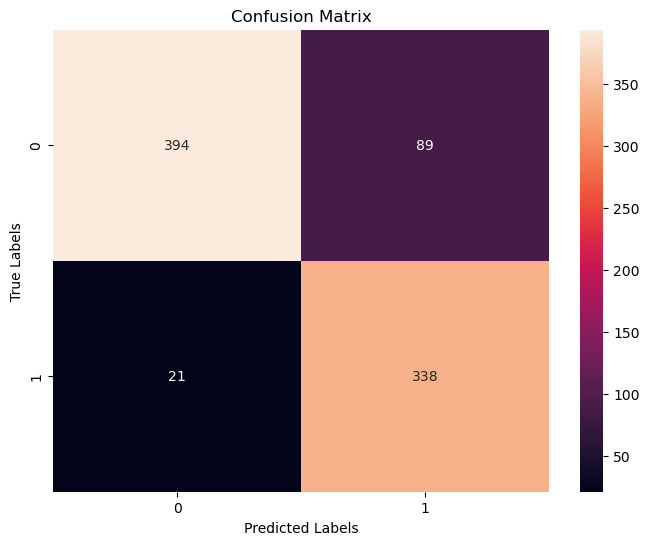

In [62]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_probs = model.predict(X_test,batch_size=32, verbose=0)
y_pred = (y_pred_probs > 0.5).astype("int32")
print("TensorFlow Keras Classification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d").set_title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Multinomial NB Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       483
           1       0.79      0.74      0.76       359

    accuracy                           0.80       842
   macro avg       0.80      0.80      0.80       842
weighted avg       0.80      0.80      0.80       842



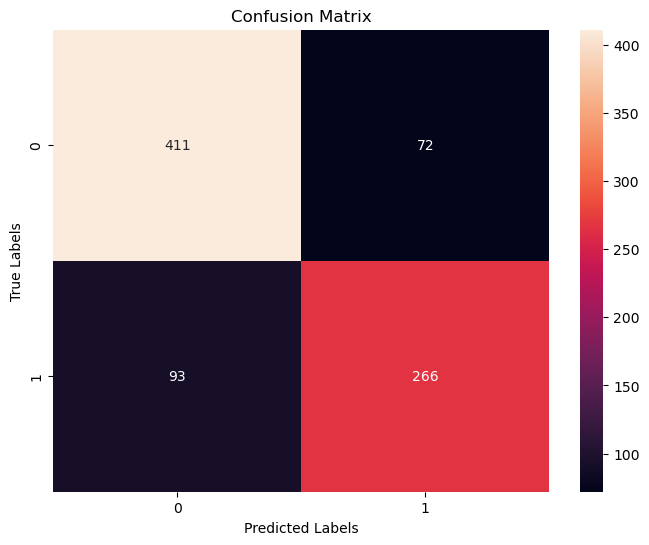

In [63]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
probabilities = mnb.predict_proba(X_test)
predicted = mnb.predict(X_test)
score = accuracy_score(y_test, predicted)
print("Multinomial NB Classification Report:")
print(classification_report(y_test, predicted))

conf_mat = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d").set_title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [64]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"TensorFlow Model Accuracy: {test_accuracy}")
print(f"Multinomial NB Accuracy: {score}")

Random Forest Accuracy: 0.9513064133016627
TensorFlow Model Accuracy: 0.8693586587905884
Multinomial NB Accuracy: 0.8040380047505938


In [65]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_tf = model.predict(X_test)[:, 0]

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


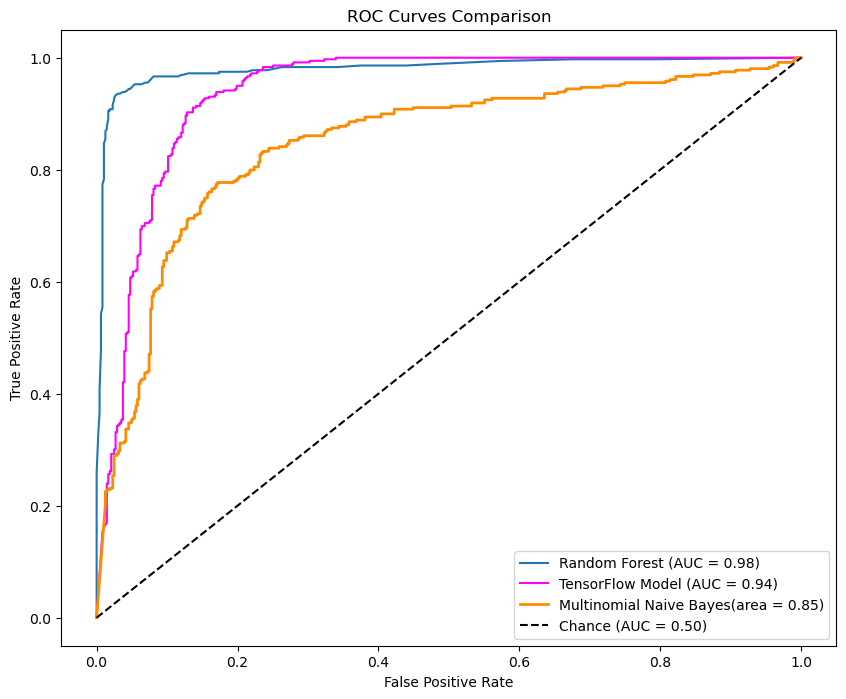

In [66]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_proba_tf)
roc_auc_tf = auc(fpr_tf, tpr_tf)
probabilities_positive_class = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_positive_class)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow Model (AUC = {roc_auc_tf:.2f})', color='magenta')# TensorFlow ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Multinomial Naive Bayes(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

In [67]:
from collections import Counter
import re

x = input("Enter File Name:")
file = open(x, "r")
email_text = file.read()

cleaned_email_text = re.sub('[^a-zA-Z\s]', '', email_text).lower()
words = cleaned_email_text.split()
word_counts = Counter(words)

keywords = [
    "make", "address", "all", "3d", "our", "over", "remove", "internet", "order", "mail",
    "receive", "will", "people", "report", "addresses", "free", "business", "email", "you",
    "credit", "your", "font", "000", "money", "hp", "hpl", "george", "650", "lab", "labs",
    "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct",
    "cs", "meeting", "original", "project", "re", "edu", "table", "conference"]

email_length = len(words)
keyword_frequencies = {keyword: 0 for keyword in keywords}
for keyword in keywords:
    if keyword in word_counts:
        keyword_frequencies[keyword] = (word_counts[keyword] / email_length) * 100

characters = [';', '(', '[', '!', '$', '#']
char_counts = Counter(email_text)
total_chars = len(email_text)
char_frequencies = {char: (char_counts[char] / total_chars) * 100 for char in characters}

capital_letters = re.findall('[A-Z]', email_text)
capital_runs = re.findall('[A-Z]+', email_text)

capital_run_length_average = np.mean([len(run) for run in capital_runs]) if capital_runs else 0
capital_run_length_longest = max([len(run) for run in capital_runs]) if capital_runs else 0
capital_run_length_total = len(capital_letters)

# **to unpack dictionary
variables = {**keyword_frequencies, **char_frequencies,
             'capital_run_length_average': capital_run_length_average,
             'capital_run_length_longest': capital_run_length_longest,
             'capital_run_length_total': capital_run_length_total}

           
corrected_variables = {
    'word_freq_make': keyword_frequencies['make'],
    'word_freq_address': keyword_frequencies['address'],
    'word_freq_all': keyword_frequencies['all'],
    'word_freq_3d': keyword_frequencies['3d'],
    'word_freq_our': keyword_frequencies['our'],
    'word_freq_over': keyword_frequencies['over'],
    'word_freq_remove': keyword_frequencies['remove'],
    'word_freq_internet': keyword_frequencies['internet'],
    'word_freq_order': keyword_frequencies['order'],
    'word_freq_mail': keyword_frequencies['mail'],
    'word_freq_receive': keyword_frequencies['receive'],
    'word_freq_will': keyword_frequencies['will'],
    'word_freq_people': keyword_frequencies['people'],
    'word_freq_report': keyword_frequencies['report'],
    'word_freq_addresses': keyword_frequencies['addresses'],
    'word_freq_free': keyword_frequencies['free'],
    'word_freq_business': keyword_frequencies['business'],
    'word_freq_email': keyword_frequencies['email'],
    'word_freq_you': keyword_frequencies['you'],
    'word_freq_credit': keyword_frequencies['credit'],
    'word_freq_your': keyword_frequencies['your'],
    'word_freq_font': keyword_frequencies['font'],
    'word_freq_000': keyword_frequencies['000'],
    'word_freq_money': keyword_frequencies['money'],
    'word_freq_hp': keyword_frequencies['hp'],
    'word_freq_hpl': keyword_frequencies['hpl'],
    'word_freq_george': keyword_frequencies['george'],
    'word_freq_650': keyword_frequencies['650'],
    'word_freq_lab': keyword_frequencies['lab'],
    'word_freq_labs': keyword_frequencies['labs'],
    'word_freq_telnet': keyword_frequencies['telnet'],
    'word_freq_857': keyword_frequencies['857'],
    'word_freq_data': keyword_frequencies['data'],
    'word_freq_415': keyword_frequencies['415'],
    'word_freq_85': keyword_frequencies['85'],
    'word_freq_technology': keyword_frequencies['technology'],
    'word_freq_1999': keyword_frequencies['1999'],
    'word_freq_parts': keyword_frequencies['parts'],
    'word_freq_pm': keyword_frequencies['pm'],
    'word_freq_direct': keyword_frequencies['direct'],
    'word_freq_cs': keyword_frequencies['cs'],
    'word_freq_meeting': keyword_frequencies['meeting'],
    'word_freq_original': keyword_frequencies['original'],
    'word_freq_project': keyword_frequencies['project'],
    'word_freq_re': keyword_frequencies['re'],
    'word_freq_edu': keyword_frequencies['edu'],
    'word_freq_table': keyword_frequencies['table'],
    'word_freq_conference': keyword_frequencies['conference'],
    'char_freq_;': char_frequencies[';'],
    'char_freq_(': char_frequencies['('],
    'char_freq_[': char_frequencies['['],
    'char_freq_!': char_frequencies['!'],
    'char_freq_$': char_frequencies['$'],
    'char_freq_#': char_frequencies['#'],
    'capital_run_length_average': capital_run_length_average,
    'capital_run_length_longest': capital_run_length_longest,
    'capital_run_length_total': capital_run_length_total
}

corrected_variables

Enter File Name:SPAM3.txt


{'word_freq_make': 0,
 'word_freq_address': 0.684931506849315,
 'word_freq_all': 2.054794520547945,
 'word_freq_3d': 0,
 'word_freq_our': 0,
 'word_freq_over': 0,
 'word_freq_remove': 0,
 'word_freq_internet': 0,
 'word_freq_order': 0,
 'word_freq_mail': 0,
 'word_freq_receive': 0,
 'word_freq_will': 1.36986301369863,
 'word_freq_people': 0,
 'word_freq_report': 0,
 'word_freq_addresses': 0,
 'word_freq_free': 0,
 'word_freq_business': 0,
 'word_freq_email': 0.684931506849315,
 'word_freq_you': 1.36986301369863,
 'word_freq_credit': 0,
 'word_freq_your': 2.054794520547945,
 'word_freq_font': 0,
 'word_freq_000': 0,
 'word_freq_money': 0,
 'word_freq_hp': 0,
 'word_freq_hpl': 0,
 'word_freq_george': 0,
 'word_freq_650': 0,
 'word_freq_lab': 0,
 'word_freq_labs': 0,
 'word_freq_telnet': 0,
 'word_freq_857': 0,
 'word_freq_data': 0,
 'word_freq_415': 0,
 'word_freq_85': 0,
 'word_freq_technology': 0,
 'word_freq_1999': 0,
 'word_freq_parts': 0,
 'word_freq_pm': 0,
 'word_freq_direct': 0,


In [68]:
new_sample_df = pd.DataFrame([corrected_variables])
new_sample_df 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0,0.684932,2.054795,0,0,0,0,0,0,0,...,0,0.0,0.121359,0.0,0.0,0.121359,0.0,1.384615,3,36


In [69]:
y_pred = rf_model.predict(new_sample_df)
if y_pred == 0:
    print("Email is not spam")
else:
    print("Email is spam")

Email is not spam


In [70]:
predictions = model.predict(new_sample_df)
print(predictions)
class_labels = (predictions > 0.5).astype(int)
if class_labels == 0:
    print("Email is not spam")
else:
    print("Email is spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.08923903]]
Email is not spam


In [71]:
mnb_predict =  mnb.predict(new_sample_df)
if mnb_predict == 0:
    print("Email is not spam")
else:
    print("Email is spam")

Email is not spam


In [72]:
#Using iterations to choose combinations most closely related.

In [73]:
feature_names = [col for col in data.columns if col != 'spam_notspam']
best_combo = []
max_corr = 0

for r in range(1, len(feature_names)+1):
    remaining = [f for f in feature_names if f not in best_combo]
    for feat in remaining:
        new_combo = best_combo + [feat]
        combined = sum(data[f] for f in new_combo)
        corr = combined.corr(data['spam_notspam'])
        if corr > max_corr:
            max_corr = corr
            best_combo = new_combo
new_combo

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_receive',
 'word_freq_people',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'char_freq_!',
 'char_freq_$',
 'word_freq_email',
 'word_freq_report',
 'capital_run_length_total']

In [74]:
keywords = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 
    'word_freq_internet', 'word_freq_order', 'word_freq_receive', 
    'word_freq_people', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_credit', 'word_freq_your', 
    'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_email', 'word_freq_report'
]

email_length = len(words)
keyword_frequencies = {keyword: 0 for keyword in keywords}
for keyword in keywords:
    key = keyword.replace('word_freq_', '')  
    if key in word_counts:
        keyword_frequencies[keyword] = (word_counts[key] / email_length) * 100

characters = ['!', '$']
char_counts = Counter(email_text)
total_chars = len(email_text)
char_frequencies = {f'char_freq_{char}': (char_counts[char] / total_chars) * 100 for char in characters}

capital_letters = re.findall('[A-Z]', email_text)
capital_run_length_total = len(capital_letters)

corrected_variables = {**keyword_frequencies, **char_frequencies,'capital_run_length_total': capital_run_length_total}
best_combo1 = [key for key in corrected_variables if key in new_combo]

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_receive', 'word_freq_people', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_email', 'word_freq_report', 'char_freq_!', 'char_freq_$', 'capital_run_length_total', 'spam_notspam']


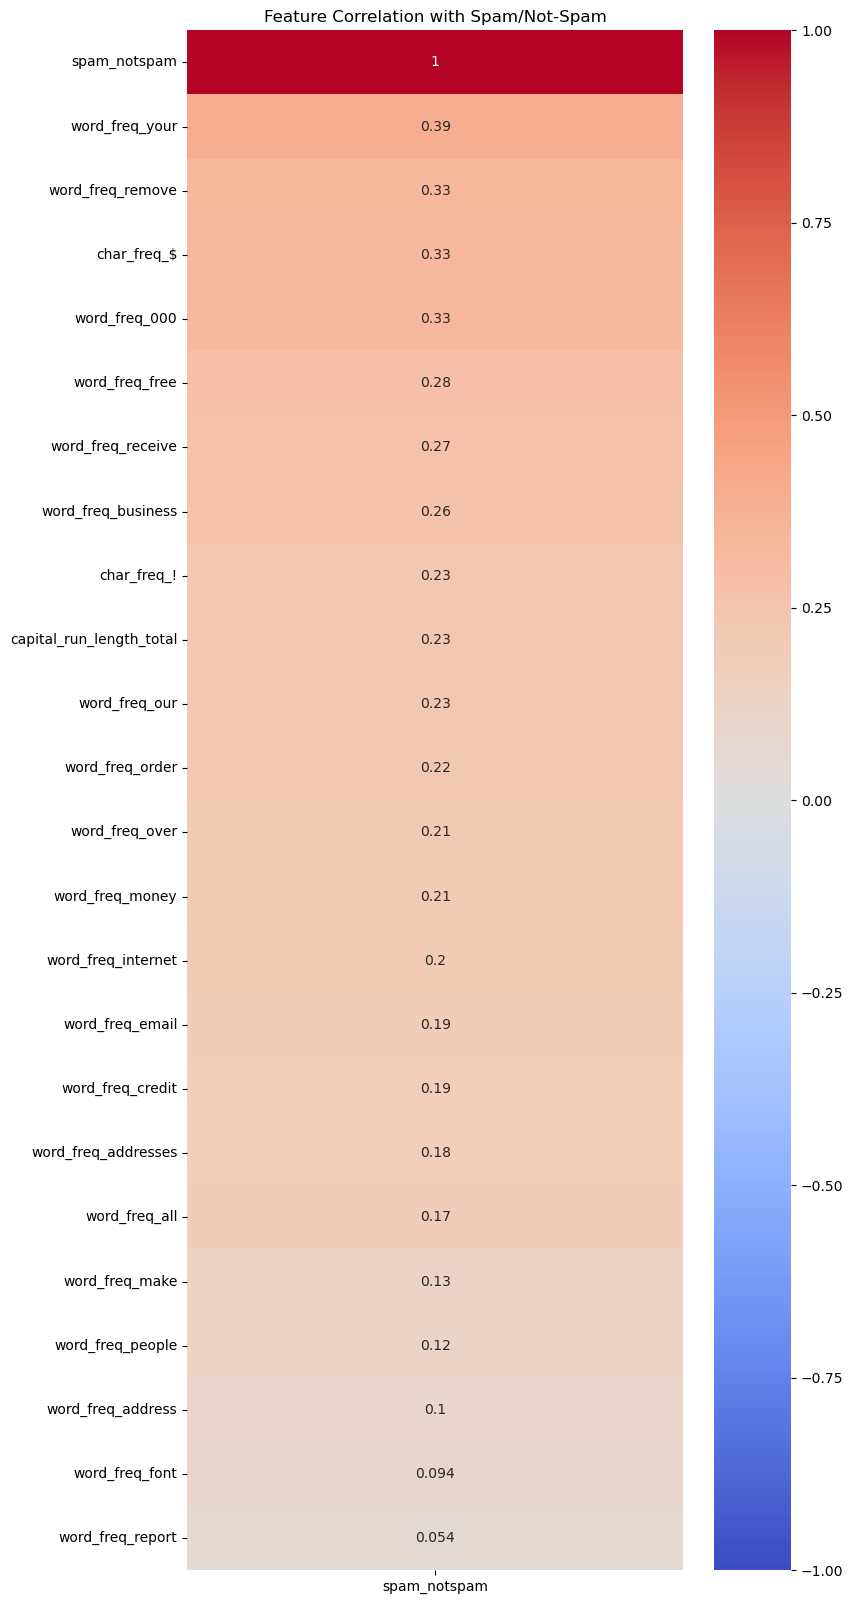

In [75]:
if 'spam_notspam' not in best_combo1:
    best_combo1.append('spam_notspam')
print(best_combo1)
datanew = data[best_combo1]
corr_matrix = datanew.corr()
plt.figure(figsize=(8, 20))
sns.heatmap(corr_matrix[['spam_notspam']].sort_values(by='spam_notspam', ascending=False), 
            vmin=-1, vmax=1, cmap='coolwarm', annot=True, cbar=True)
plt.title('Feature Correlation with Spam/Not-Spam')
plt.show()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5457 - loss: 1.3921 - val_accuracy: 0.8249 - val_loss: 0.5839
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.7468 - val_accuracy: 0.8249 - val_loss: 0.5373
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7911 - loss: 0.6490 - val_accuracy: 0.7893 - val_loss: 0.5142
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7713 - loss: 0.7310 - val_accuracy: 0.8620 - val_loss: 0.4016
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.6441 - val_accuracy: 0.8501 - val_loss: 0.3951
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.5175 - val_accuracy: 0.8323 - val_loss: 0.4474
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8181 - loss: 0.5841 - val_accuracy: 0.8887 - val_loss: 0.3122
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 0.5943 - val_accuracy: 0.7359 - val_loss:

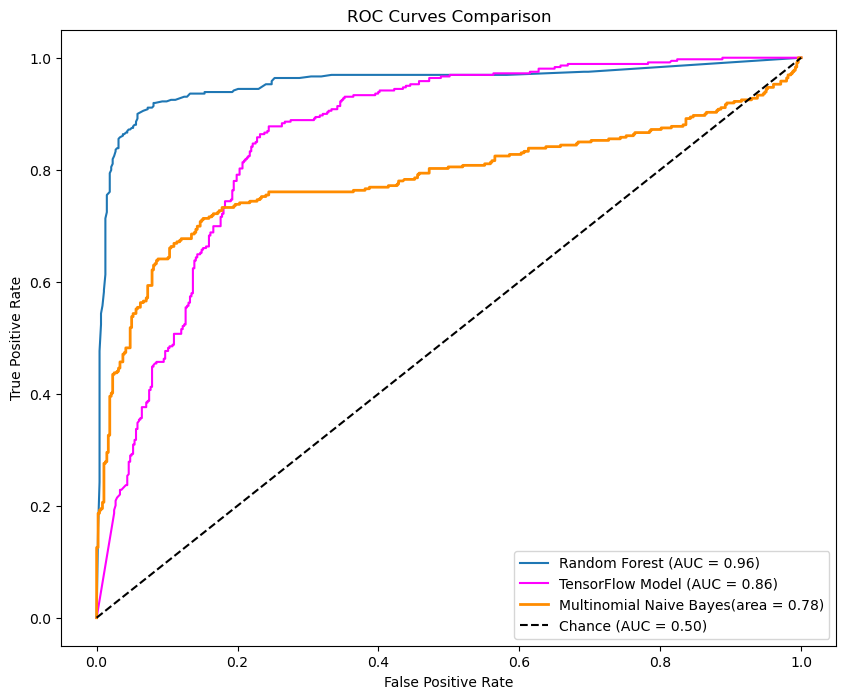

In [76]:
X = datanew.drop('spam_notspam', axis=1)
y = datanew['spam_notspam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_probs = model.predict(X_test,batch_size=32, verbose=0)
y_pred = (y_pred_probs > 0.5).astype("int32")
print("TensorFlow Keras Classification Report:")
print(classification_report(y_test, y_pred))
print(f"TensorFlow Model Accuracy: {test_accuracy}")

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
probabilities = mnb.predict_proba(X_test)
predicted = mnb.predict(X_test)
score = accuracy_score(y_test, predicted)

print("Multinomial NB Classification Report:")
print(classification_report(y_test, predicted))


print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"TensorFlow Model Accuracy: {test_accuracy}")
print(f"Multinomial NB Accuracy: {score}")

y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_tf = model.predict(X_test)[:, 0]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_proba_tf)
roc_auc_tf = auc(fpr_tf, tpr_tf)
probabilities_positive_class = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_positive_class)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow Model (AUC = {roc_auc_tf:.2f})', color='magenta')# TensorFlow ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Multinomial Naive Bayes(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

In [77]:
new_sample_df = pd.DataFrame([corrected_variables])
new_sample_df 

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_people,...,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_email,word_freq_report,char_freq_!,char_freq_$,capital_run_length_total
0,0,0.684932,2.054795,0,0,0,0,0,0,0,...,0,2.054795,0,0,0,0.684932,0,0.0,0.121359,36


In [78]:
y_pred_new_sample = rf_model.predict(new_sample_df)
if y_pred_new_sample == 0:
    print("Email is not spam")
else:
    print("Email is spam")

Email is not spam


In [79]:
predictions = model.predict(new_sample_df)
print(predictions)
class_labels = (predictions > 0.5).astype(int)
if class_labels == 0:
    print("Email is not spam")
else:
    print("Email is spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.1065954]]
Email is not spam


In [80]:
mnb_predict =  mnb.predict(new_sample_df)
print(mnb_predict)
if mnb_predict == 0:
    print("Email is not spam")
else:
    print("Email is spam")

[0]
Email is not spam
